# TRABALHO DE CONCLUSÃO DE CURSO - LUCAS DE MELO SOUZA

Este notebook serve como material complementar de entregáveis para defesa do tcc para obtenção do título de bacharel em Engenharia Mecânica, pela Universidade Federal de Pernambuco.

Segundo o material fornecido, o trabalho foi dividido em duas etapas. Uma com a análise de simulação e qualidade de peças em relação ao _Slicing Software_ outra com análise do processo de impressão em relação a Impressora em si.

## IMPORTAR BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
pd.options.display.max_rows = 999

## IMPORTAR DADOS

In [2]:
parte_3 = pd.read_excel('TCC_TUDO.xlsx',sheet_name='TCC_2_DADOS')

### PARTE 3

A ideia é se utilizar do _Slicing Software_ escolhido como mais adequado para a necessidade deste trabalho, onde foram analisados: Tempo de Impressão, Consumo, Fluxo de gasto e as dimensões obtidas em relação ao projetado no CAD.

Para selecionar os experimentos, foi modelado um _DOE_ do tipo I-_Optimal Design, adequado para análises preditivas e funções de comportamento de processos. O  DOE_ foi feito pelo _DesignExpert 11_.

Na criação do _DOE_ foram aplicados 5 fatores contínuos:
 - Altura de Camada;
 - Preenchimento;
 - Velocidade de Impressão;
 - Temperatura de Extrusão;
 - Potência percentual da Ventoinha (ou _TURBO FAN_).
 Com as saídas:
 - Tempo de Impressão;
 - Consumo de material;
 - Fluxo de gasto;

E claro, as dimensões do _Benchmark_ Geométrico mostrado abaixo:

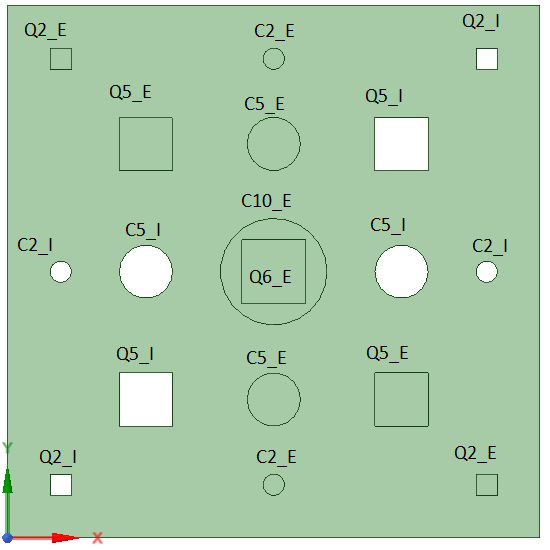

Onde a primeira letra indica se a geometria possui perfil Circular ou Quadricular, seguido da dimensão nominal em mm, e uma letra E ou I, indicando E como Extrusão e I como geometria Interna (Furo)

Abaixo, segue o formato dos dados coletados por medições:

In [3]:
parte_3.head(5)

,Altura_camada(mm),Preenchimento(%),Velocidade_Impressão(mm/s),Temperatura(ºC),Pot_Ventoinha(%),Tempo_processo_real (min),Consumo_real(R$),Fluxo_gasto (R$/h),Tempo_processo_esperado(min),Consumo_esperado(R$),Q5_I(mm²),Q2_I(mm²),Q2_E(mm²),Q5_E(mm²),Q6_E(mm²),C2_I(mm),C5_I(mm),C2_E(mm),C5_E(mm),C10_E(mm)
0,0.100,45.0,30.000,200.000,0.0,122.00,1.0125,0.51,115,1.045005,24.177700,3.659300,4.927125,26.892325,37.97490,1.815000,4.691667,2.075000,5.068333,10.050000
1,0.210,15.0,71.600,211.500,100.0,36.00,0.9855,1.73,32,1.036035,25.614675,4.202325,4.885325,27.038450,39.14910,1.786667,4.698333,2.103333,4.860000,10.120000
2,0.165,15.0,84.074,204.226,0.0,37.00,0.8565,1.49,31,0.919425,25.393350,4.399475,4.834050,26.949000,37.54450,1.776667,4.920000,2.125000,4.936667,10.136667
3,0.100,15.0,110.000,200.000,50.0,42.75,0.7305,1.08,34,0.771420,24.302525,4.212075,4.157675,26.135700,37.79165,2.061667,4.806667,2.036667,4.891667,10.046667
4,0.200,45.0,30.000,208.100,100.0,81.25,1.1880,0.90,78,1.224405,24.513100,3.790450,4.817800,27.550450,38.77110,1.743333,4.673333,2.093333,5.055000,10.246667


A ideia será fazer uma análise exploratória de dados, para responder as seguintes perguntas:

- A deformação em furos e peças extrudadas funciona da mesma forma?
- A deformação é influenciada pelo formato e tamanho de geometria?
- Qual o melhor modelagem para prever as respostas do processo ?
- Como cada fator influencia sobre as saídas do processo?
- Qual a condição ótima de processo ?

#### RESPONDENDO QUESTIONAMENTOS

##### A deformação em furos e peças extrudadas funciona da mesma forma?

Para solucionar este problema é importante analisar a função Erro Percentual, dada por: $$E_p = \frac{D_o - D_p}{D_p}*100[\%]$$

- Comparar Q2_I e Q2_E

In [4]:
#ERRO DE Q2_I
erro_1 = ( (parte_3['Q2_I(mm²)'].values - 4)/4 )*100
#ERRO DE Q2_E
erro_2 = ( (parte_3['Q2_E(mm²)'].values - 4)/4 )*100

In [5]:
#dataframe para comparação
comp = pd.DataFrame({'Erro: Q2_I':erro_1,'Erro: Q2_E':erro_2})
comp.head(5)

,Erro: Q2_I,Erro: Q2_E
0,-8.517500,23.178125
1,5.058125,22.133125
2,9.986875,20.851250
3,5.301875,3.941875
4,-5.238750,20.445000


Plotando _Boxplot_ :

Text(0.5, 0, 'Geometrias')

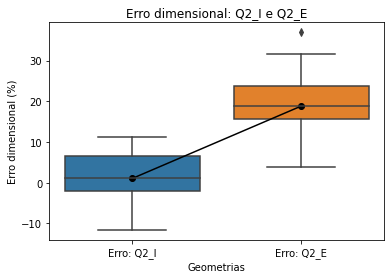

In [6]:
sn.boxplot(data=comp)
medias = [comp['Erro: Q2_I'].median(), comp['Erro: Q2_E'].median()]
plt.plot(['Erro: Q2_I','Erro: Q2_E'],medias,'-o',color="black")
plt.title("Erro dimensional: Q2_I e Q2_E")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Inicialmente, percebe-se que o erro na geometria extrudada é bem maior. Mas o que garante que essa diferença não é apenas por efeitos aleatórios? É necessário aplicar o teste de hipótese para duas amostras, para um p-valor = 0.05

In [7]:
import scipy.stats as sct
teste_2amostras = sct.ttest_ind(a=comp['Erro: Q2_I'],b=comp['Erro: Q2_E'],equal_var=False)

Caso o p-valor do teste retorne menor ou igual a 0.05, a hipótese nula de que a média do erro é igual para ambas geometrias poderá ser rejeitada mediante 95% de confiança:

In [8]:
teste_2amostras.pvalue

7.200441445468427e-20

Com isso, sabe-se que para geometrias de perfis quadriculares com 4mm² de área, de fato há a diferença. E para geometrias maiores?

- Comparar Q5_I e Q5_E

In [9]:
#ERRO DE Q5_I
erro_1 = ( (parte_3['Q5_I(mm²)'].values - 25)/25 )*100
#ERRO DE Q5_E
erro_2 = ( (parte_3['Q5_E(mm²)'].values - 25)/25 )*100

In [10]:
#dataframe para comparação
comp = pd.DataFrame({'Erro: Q5_I':erro_1,'Erro: Q5_E':erro_2})
comp.head(5)

,Erro: Q5_I,Erro: Q5_E
0,-3.2892,7.5693
1,2.4587,8.1538
2,1.5734,7.7960
3,-2.7899,4.5428
4,-1.9476,10.2018


Text(0.5, 0, 'Geometrias')

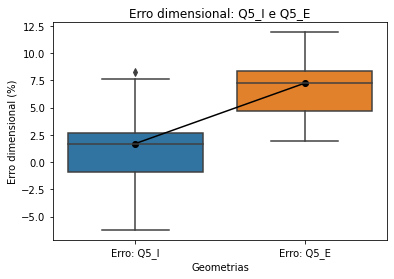

In [11]:
sn.boxplot(data=comp)
medias = [comp['Erro: Q5_I'].median(), comp['Erro: Q5_E'].median()]
plt.plot(['Erro: Q5_I','Erro: Q5_E'],medias,'-o',color="black")
plt.title("Erro dimensional: Q5_I e Q5_E")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Agora, aplicando o teste de hipóteses:

In [12]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: Q5_I'],b=comp['Erro: Q5_E'],equal_var=False)
teste_2amostras.pvalue

8.874831548100224e-13

Houve uma ligeira redução na inclinação da curva, o que pode indicar que quanto maior a geometria, menos suscetível ao erro de impressão ela está. E para geometrias de perfil circular ?

- Comparar C2_I e C2_E

In [13]:
#ERRO DE C2_I
erro_1 = ( (parte_3['C2_I(mm)'].values - 2)/2 )*100
#ERRO DE C2_E
erro_2 = ( (parte_3['C2_E(mm)'].values - 2)/2 )*100

In [14]:
#dataframe para comparação
comp = pd.DataFrame({'Erro: C2_I':erro_1,'Erro: C2_E':erro_2})
comp.head(5)

,Erro: C2_I,Erro: C2_E
0,-9.250000,3.750000
1,-10.666667,5.166667
2,-11.166667,6.250000
3,3.083333,1.833333
4,-12.833333,4.666667


In [15]:
comp.describe()

,Erro: C2_I,Erro: C2_E
count,40.000000,40.000000
mean,-8.708333,4.783333
std,4.149409,3.499023
min,-22.166667,-3.166667
25%,-10.791667,3.062500
50%,-8.708333,5.041667
75%,-6.729167,6.666667
max,3.083333,11.416667


Text(0.5, 0, 'Geometrias')

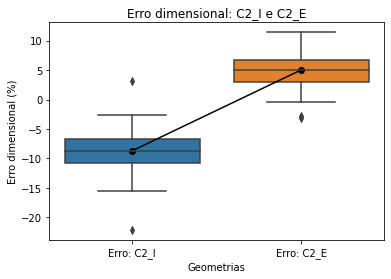

In [16]:
sn.boxplot(data=comp)
medias = [comp['Erro: C2_I'].median(), comp['Erro: C2_E'].median()]
plt.plot(['Erro: C2_I','Erro: C2_E'],medias,'-o',color="black")
plt.title("Erro dimensional: C2_I e C2_E")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Analogamente, aplicando o teste de hipóteses:

In [17]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: C2_I'],b=comp['Erro: C2_E'],equal_var=True)
teste_2amostras.pvalue

6.810573448929118e-26

Para geometrias de perfil circular com tamanho maior, segue-se o mesmo raciocínio:

In [18]:
#ERRO DE C5_I
erro_1 = ( (parte_3['C5_I(mm)'].values - 5)/5 )*100
#ERRO DE C5_E
erro_2 = ( (parte_3['C5_E(mm)'].values - 5)/5 )*100

In [19]:
#dataframe para comparação
comp = pd.DataFrame({'Erro: C5_I':erro_1,'Erro: C5_E':erro_2})
comp.head(5)

,Erro: C5_I,Erro: C5_E
0,-6.166667,1.366667
1,-6.033333,-2.800000
2,-1.600000,-1.266667
3,-3.866667,-2.166667
4,-6.533333,1.100000


Text(0.5, 0, 'Geometrias')

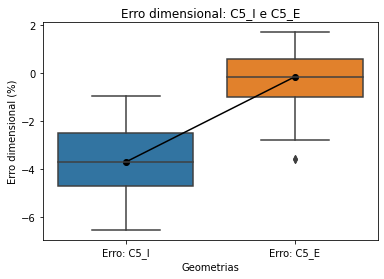

In [20]:
sn.boxplot(data=comp)
medias = [comp['Erro: C5_I'].median(), comp['Erro: C5_E'].median()]
plt.plot(['Erro: C5_I','Erro: C5_E'],medias,'-o',color="black")
plt.title("Erro dimensional: C5_I e C5_E")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Semelhante, o mesmo efeito ocorreu: Os erros de geometrias são menores, e a dependência da geometria ser furo ou extrudada se torna menor com o tamanho da mesma. É de se esperar, já que quanto maior a geometria, mais fácil da impressora conseguir imprimir.

##### A deformação é influenciada pelo tipo e tamanho de geometria?

Para isso, serão feitos os seguintes testes: Boxplot de Quadriculares e Circulares, para cada um dos tipos de geometria: Internas e Externas.

###### GEOMETRIAS QUADRICULARES INTERNAS

Text(0.5, 0, 'Geometrias')

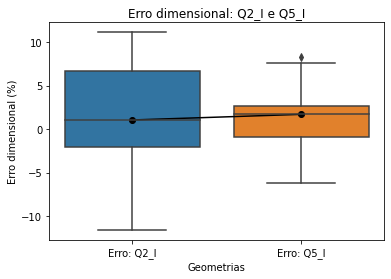

In [21]:
#ERRO DE Q2_I
erro_1 = ( (parte_3['Q2_I(mm²)'].values - 4)/4 )*100
#ERRO DE Q5_I
erro_2 = ( (parte_3['Q5_I(mm²)'].values - 25)/25 )*100
#dataframe para comparação
comp = pd.DataFrame({'Erro: Q2_I':erro_1,'Erro: Q5_I':erro_2})
comp.head(5)

sn.boxplot(data=comp)
medias = [comp['Erro: Q2_I'].median(), comp['Erro: Q5_I'].median()]
plt.plot(['Erro: Q2_I','Erro: Q5_I'],medias,'-o',color="black")
plt.title("Erro dimensional: Q2_I e Q5_I")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

O comportamento foi o oposto do esperado, com o erro aumentando com o tamanho da geometria. Aplicando o teste de hipóteses:

In [22]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: Q2_I'],b=comp['Erro: Q5_I'],equal_var=True)
teste_2amostras.pvalue

0.6861197845608364

Com isso, nota-se que não há recursos suficientes para negar que o erro não é influenciado pelo tamanho da geometria. O que contradiz com o que foi dito na pergunta anterior. Será aplicado o mesmo questionamento em outros 3 casos, como segue abaixo:

###### GEOMETRIAS QUADRICULARES EXTERNAS

Text(0.5, 0, 'Geometrias')

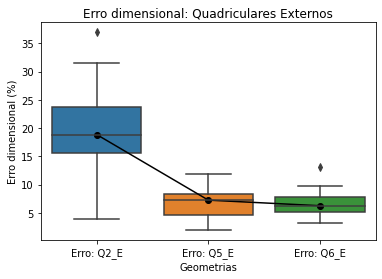

In [23]:
#ERRO DE Q2_E
erro_1 = ( (parte_3['Q2_E(mm²)'].values - 4)/4 )*100
#ERRO DE Q5_E
erro_2 = ( (parte_3['Q5_E(mm²)'].values - 25)/25 )*100
#Erro de Q6_E
erro_3 = ( (parte_3['Q6_E(mm²)'].values - 36)/36 )*100
#dataframe para comparação
comp = pd.DataFrame({'Erro: Q2_E':erro_1,'Erro: Q5_E':erro_2,'Erro: Q6_E':erro_3})

sn.boxplot(data=comp)
medias = [comp['Erro: Q2_E'].median(), comp['Erro: Q5_E'].median(),comp['Erro: Q6_E'].median()]
plt.plot(['Erro: Q2_E','Erro: Q5_E','Erro: Q6_E'],medias,'-o',color="black")
plt.title("Erro dimensional: Quadriculares Externos")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Percebe-se pelo gráfico acima que as geometrias quadriculadas externas possuem o erro variável com o tamanho. Aplicando o teste de hipótese verifica que o gráfico mostra o esperado:

In [24]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: Q2_E'],b=comp['Erro: Q5_E'],equal_var=True)
teste_2amostras.pvalue

1.1289829476568015e-17

In [25]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: Q5_E'],b=comp['Erro: Q6_E'],equal_var=True)
teste_2amostras.pvalue

0.48392349372838794

Aparenta haver um limiar onde o erro se torna menos variável com o tamanho, e que a geometria influencie menos.

###### GEOMETRIAS CIRCULARES INTERNAS

Text(0.5, 0, 'Geometrias')

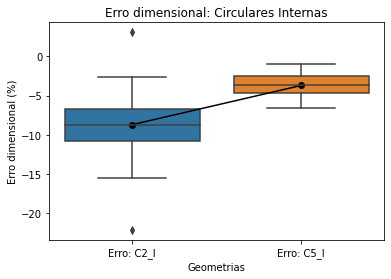

In [26]:
#ERRO DE C2_I
erro_1 = ( (parte_3['C2_I(mm)'].values - 2)/2 )*100
#ERRO DE Q5_E
erro_2 = ( (parte_3['C5_I(mm)'].values - 5)/5 )*100
#dataframe para comparação
comp = pd.DataFrame({'Erro: C2_I':erro_1,'Erro: C5_I':erro_2})

sn.boxplot(data=comp)
medias = [comp['Erro: C2_I'].median(), comp['Erro: C5_I'].median()]
plt.plot(['Erro: C2_I','Erro: C5_I'],medias,'-o',color="black")
plt.title("Erro dimensional: Circulares Internas")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

Percebe-se que o mesmo ocorreu com as geometrias quadriculares internas. Pode-se supor que de fato com geometrias pequenas, o erro aumenta diretamente com o tamanho da geometria. Aplicando o teste de hipóteses:

In [27]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: C2_I'],b=comp['Erro: C5_I'],equal_var=True)
teste_2amostras.pvalue

5.264785181252329e-10

Então de fato isso ocorre com geometrias do tipo circular. Pode-se imaginar que as geometrias quadriculares internas são menos sensíveis a isso do que as circulares.

###### GEOMETRIAS CIRCULARES EXTERNAS

Text(0.5, 0, 'Geometrias')

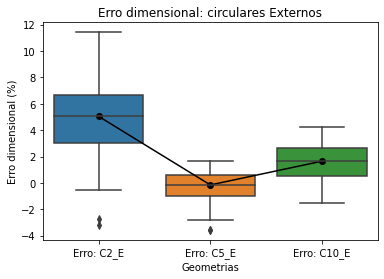

In [28]:
#ERRO DE C2_E
erro_1 = ( (parte_3['C2_E(mm)'].values - 2)/2 )*100
#ERRO DE C5_E
erro_2 = ( (parte_3['C5_E(mm)'].values - 5)/5 )*100
#Erro de C10_E
erro_3 = ( (parte_3['C10_E(mm)'].values - 10)/10 )*100
#dataframe para comparação
comp = pd.DataFrame({'Erro: C2_E':erro_1,'Erro: C5_E':erro_2,'Erro: C10_E':erro_3})

sn.boxplot(data=comp)
medias = [comp['Erro: C2_E'].median(), comp['Erro: C5_E'].median(),comp['Erro: C10_E'].median()]
plt.plot(['Erro: C2_E','Erro: C5_E','Erro: C10_E'],medias,'-o',color="black")
plt.title("Erro dimensional: circulares Externos")
plt.ylabel("Erro dimensional (%)")
plt.xlabel("Geometrias")

De 2 a 5 mm, o comportamento foi esperado, por ocorrer de forma semelhante as geometrias quadriculares. Porém o aumento em 10mm não foi esperado. Aplicando os testes de hipóteses:

In [29]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: C2_E'],b=comp['Erro: C5_E'],equal_var=True)
teste_2amostras.pvalue

4.866360218283124e-13

In [30]:
teste_2amostras = sct.ttest_ind(a=comp['Erro: C5_E'],b=comp['Erro: C10_E'],equal_var=True)
teste_2amostras.pvalue

4.0928389117512915e-09

##### Qual o melhor modelagem para prever as respostas do processo ?

Nesta etapa,serão aplicados alguns Algorítmos de _Machine Learning_ para verficiar a capacidade preditiva do modelo, utilizando algumas métricas.

In [31]:
input_feats = ['Altura_camada(mm)','Preenchimento(%)','Velocidade_Impressão(mm/s)','Temperatura(ºC)','Pot_Ventoinha(%)']
output_feats = parte_3.columns.tolist()
output_feats = output_feats[5:]

In [32]:
X_data = parte_3[input_feats].values
Y_data = parte_3[output_feats].values

Text(0.5, 1.0, 'GRÁFICO DE CORRELAÇÕES')

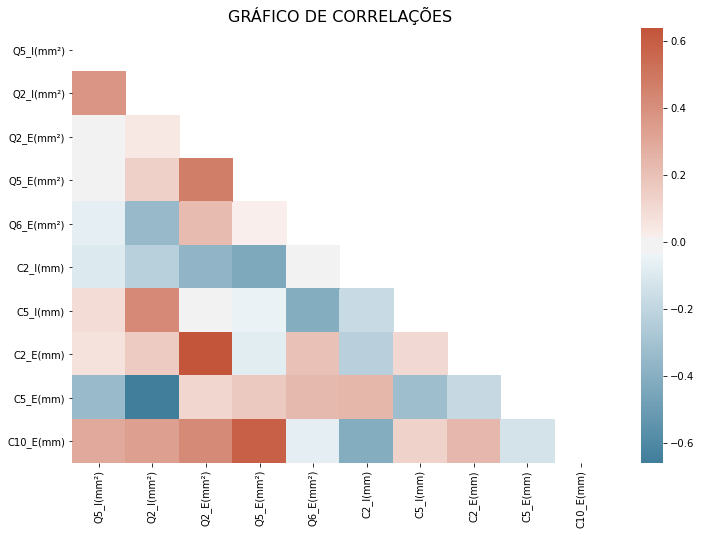

In [33]:
plt.figure(figsize=(12,8))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(parte_3.corr().iloc[10:,10:], dtype=bool))
sn.heatmap(parte_3.corr().iloc[10:,10:],mask=mask,cmap=cmap)
plt.title("GRÁFICO DE CORRELAÇÕES",fontsize=16)

Nota-se que a maioria das features não possuem fortes correlações, o que já era esperado. Por isso, a ideia é aplicar um modelo de _Machine Learning_ para cada feature.

Agora, o modelo será dividio entre dataset de teste e de treino:

Agora, os algorítmos serão testados. Foram escolhidos 6 algorítmos: Linear Regression, Lasso Regression, Ridge Ression, Support Vectorial Machine, Decision Tree, Random Forest.

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

A ideia é aplicar e ver quais são as melhores métricas. Serão utilizadas 3 métricas: R²,R² ajustado e R² predito.

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [36]:
def r2_adjusted_score(r2,n,p):
    return 1 - ((1-r2)*(n-1)) / (n - p  -1)

In [37]:
def r2_predict_score(X,y_true,y_pred):
    #CALCULA A MATRIZ H
    H = np.dot(np.dot(X,np.linalg.inv(np.dot(X.T,X))),X.T)
    #CALCULA O VETOR e 
    e = y_true - y_pred
    #calcula n e p
    n = len(X)
    p = len(X[0])
    #calcular o PRESS
    # Inicializa o valor de PRESS
    PRESS = 0
    for i in range(0,n):
        PRESS = PRESS + (e[i]/(1-H[i,i]))**2
    #calcula o valor de SSt -> total sum of squares
    SST = 0 
    for i in range(0,n):
        SST = SST + (y_true[i] - np.mean(y_true))**2
    #calcula agora o r2 predito
    return 1 - (PRESS/SST)

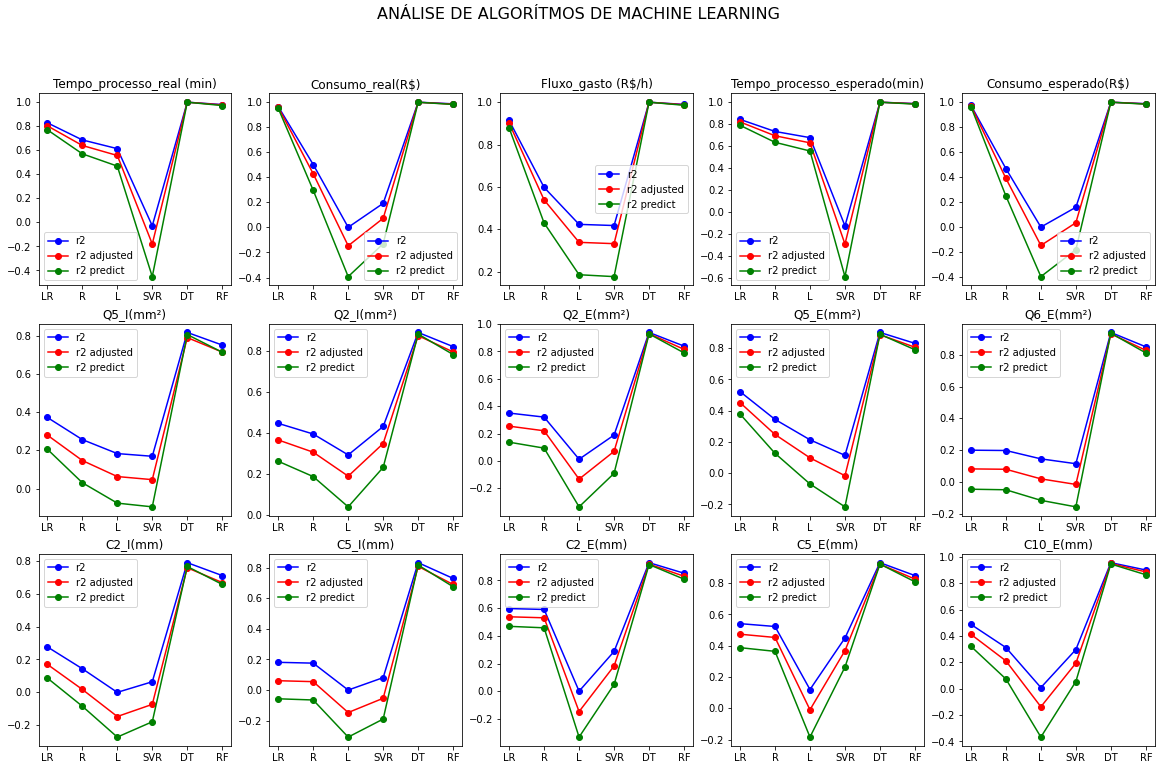

In [38]:
plt.subplots(3,5,figsize=(20,12))
for j in range(0,len(Y_data[0])):
    r2_lista = []
    r2_a_lista = []
    r2_p_lista = []
    mse_lista = []
    exp_var = []
    list_alg = ['LR','R','L','SVR','DT','RF']
    algoritmos = [LinearRegression(),Ridge(),Lasso(),SVR(),DecisionTreeRegressor(random_state=42),RandomForestRegressor(n_estimators=150,random_state=42)]
    for i in range(0,len(algoritmos)):
        #aplicar o fit na resposta a se analisar
        algoritmos[i].fit(X_data,Y_data[:,j])
        #aplica o predict
        y_pred = algoritmos[i].predict(X_data)
        #calcula o r2 score para esse algorítmo
        r2_lista.append(r2_score(Y_data[:,j],y_pred))
        #calcula o r2 ajustado para esse algorítmo
        r2_a_lista.append(r2_adjusted_score(r2_score(Y_data[:,j],y_pred),40,5))
        #calcula o r2 predito para esse algorítmo
        r2_p_lista.append(r2_predict_score(X_data,Y_data[:,j],y_pred))
        #calcula o mean sum of squares para esse algoritmo
        mse_lista.append(mean_squared_error(Y_data[:,j],y_pred))
        #calcula a variancia explicada pare esse algorítmo
        exp_var.append(explained_variance_score(Y_data[:,j],y_pred))
    #agora é a parte de fazer o plot
    plt.subplot(3,5,j+1)
    plt.plot(list_alg,r2_lista,marker = 'o',color= "blue")
    plt.plot(list_alg,r2_a_lista,marker = 'o',color = "red")
    plt.plot(list_alg,r2_p_lista,marker = 'o',color = "green")
    plt.legend(['r2','r2 adjusted','r2 predict'])
    plt.title(parte_3.columns[5+j])
    plt.suptitle("ANÁLISE DE ALGORÍTMOS DE MACHINE LEARNING",fontsize=16)

É uma ideia interessante aplicar um teste de validação cruzada para otimizar alguns parâmetros de regressão, para obter modelos com maior poder preditivo.

Diante do visto, o algorítmo DecisionTreeRegressor é o mais adequado para predições, visto que as três métricas apresentam valores semelhantes, o que indica que as variáveis selecionadas não são irrelevantes para o modelo, e que o efeito de _overfitting_ não é relevante.

### HORA DE APLICAR O MODELO DE MACHINE LEARNING

In [39]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_data,Y_data)

DecisionTreeRegressor(random_state=42)

Uma peça foi impressa para testar a utilidade do modelo, utilizando-se das seguintes configurações:
- Altura de camada: 0.1 mm
- Preenchimento: 26 %
- Velocidade de Impressão: 102 mm/s
- Temperatura de extrusão: 200ºC
- Velocidade da ventoinha: 78%

In [40]:
results = regressor.predict(np.array([0.1,26,102,200,78]).reshape(1,5))

In [41]:
resultado=[]
for i in range(0,len(results[0])):
    resultado.append(round(results[0,i],2))

Segue abaixo a comparação do obtido e previsto:

In [42]:
pd.DataFrame(data = {"Previsto":resultado[5:],"Obtido":[25.77,4.10,4.77,25.49,37.27,1.82,4.78,2.09,4.90,10.03]},index=parte_3.columns[10:])

,Previsto,Obtido
Q5_I(mm²),23.87,25.77
Q2_I(mm²),4.29,4.10
Q2_E(mm²),4.70,4.77
Q5_E(mm²),25.91,25.49
Q6_E(mm²),37.17,37.27
C2_I(mm),1.81,1.82
C5_I(mm),4.84,4.78
C2_E(mm),2.10,2.09
C5_E(mm),4.94,4.90
C10_E(mm),10.04,10.03


É importante calcular a importância de cada feature sobre a resposta do modelo:

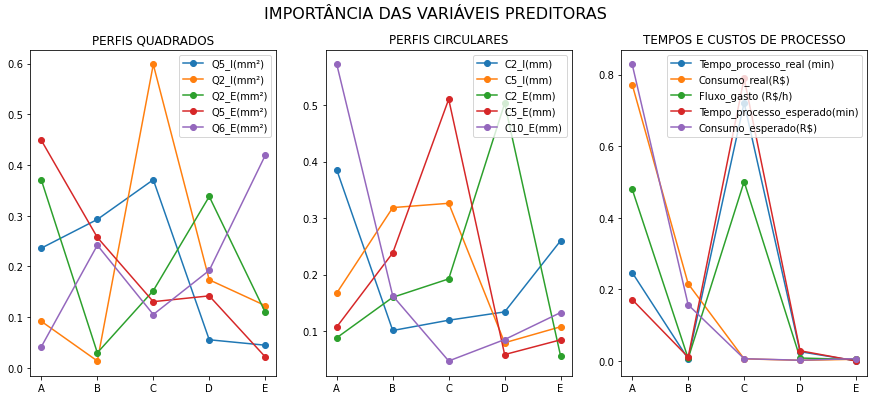

In [43]:
plt.subplots(1,3,figsize=(15,6))
input_feats = ['A','B','C','D','E']
plt.subplot(1,3,1)
for i in range(0,5):
    regressor.fit(X_data,Y_data[:,5+i])
    feat_import = regressor.feature_importances_
    plt.plot(input_feats,feat_import,marker='o')
    plt.title("PERFIS QUADRADOS")
    plt.legend(['Q5_I(mm²)','Q2_I(mm²)','Q2_E(mm²)','Q5_E(mm²)','Q6_E(mm²)'])
plt.subplot(1,3,2)
for i in range(5,10):
    regressor.fit(X_data,Y_data[:,5+i])
    feat_import = regressor.feature_importances_
    plt.plot(input_feats,feat_import,marker='o')
    plt.title("PERFIS CIRCULARES")
    plt.legend(['C2_I(mm)','C5_I(mm)','C2_E(mm)','C5_E(mm)','C10_E(mm)'])
plt.subplot(1,3,3)
for i in range(0,5):
    regressor.fit(X_data,Y_data[:,i])
    feat_import = regressor.feature_importances_
    plt.plot(input_feats,feat_import,marker='o')
    plt.title("TEMPOS E CUSTOS DE PROCESSO")
    plt.legend(parte_3.columns[5:10].tolist())
plt.suptitle("IMPORTÂNCIA DAS VARIÁVEIS PREDITORAS",fontsize=16)
plt.show()

Mas aí, surge a grande questão, como achar o valor correspondente a condição operacional ótima?

Como o modelo aplicado é não paramétrico, isto é, não possui uma expressão analítica, a melhor ideia que tive foi criar uma malha 5-D e aplicar a predição, e aí calcular a função  _desirability_ .

**Mas o quão refinado será essa malha?**

Como se trata de um TCC, a ideia é ilustrar a funcionalidade, serão escolhidos 5 pontos de cada inputs

In [58]:
A = np.arange(0.1,0.35,0.05).tolist()
B = np.arange(15,52.5,7.5).tolist()
C = np.arange(30,130,20).tolist()
D = np.arange(200,225,5).tolist()
E = np.arange(0,125,25).tolist()

Para gerar a malha, foi usada a função np.meshgrid:

In [59]:
mesh = np.array(np.meshgrid(A,B,C,D,E)).T.reshape(-1,5)

In [60]:
y_mesh =np.zeros((len(mesh),15))

Agora deverão ser criados 15 modelos preditivos, um para cada saída do algorítmo:

In [61]:
for i in range(0,15):
    regressor.fit(X_data,Y_data[:,i])
    y_mesh[:,i]=regressor.predict(mesh)

Agora é necessário aplicar a função desirability:

In [62]:
#pegar valores maximos
upper_values = []
lower_values  =[]
for i in range(0,len(Y_data[0])):
    upper_values.append(np.max(Y_data[:,i]))
    lower_values.append(np.min(Y_data[:,i]))

In [68]:
target_values = [25,4,4,25,36,2,5,2,5,10]
r1 = 1.5
r2 = 2
r= 1
d_values = np.zeros(y_mesh.shape)
for i in range(0,len(y_mesh)):
    for j in range(0,len(y_mesh[0])):
        #print(parte_3.columns[j+5])
        if j>4:
        #COMO TODAS AS FUNÇÕES SÃO DO TIPO TARGET,SEGUE-SE
            if y_mesh[i,j] < lower_values[j-5]:
                d_values[i,j] = 0
            if y_mesh[i,j] >= lower_values[j-5] and y_mesh[i,j] <= target_values[j-5]:
                d_values[i,j] = ( (y_mesh[i,j] - lower_values[j-5]) / (target_values[j-5] - lower_values[j-5]) ) **r1
            if y_mesh[i,j] >= target_values[j-5] and y_mesh[i,j] <= upper_values[j-5]:
                d_values[i,j] = ( (upper_values[j-5] - y_mesh[i,j]) / (upper_values[j-5] - target_values[j-5]) )**r2
            else:
                d_values[i,j] = 0
        else:
            #VARIÁVEL DO TIPO MINIMIZA
            if y_mesh[i,j] < np.min(Y_data[:,j]):
                d_values[i,j] = 1
            if y_mesh[i,j] >= np.min(Y_data[:,j]) or y_mesh[i,j] <= np.max(Y_data[:,j]):
                d_values[i,j] = ( (np.max(Y_data[:,j]) - y_mesh[i,j]) / (np.max(Y_data[:,j]) - np.min(Y_data[:,j])) )**r
            else:
                d_values[i,j] = 0

In [69]:
D_values =[]
for i in range(0,len(d_values)):
    D_values.append(np.cumprod(d_values[i,:]))

In [70]:
np.max(D_values)

1.0

In [71]:
np.where(D_values ==np.max(D_values))[0]

array([ 115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  240,
        241,  242,  243,  244,  245,  246,  247,  248,  249,  365,  366,
        367,  368,  369,  370,  371,  372,  373,  374,  740,  741,  742,
        743,  744,  745,  746,  747,  748,  749,  865,  866,  867,  868,
        869,  870,  871,  872,  873,  874,  990,  991,  992,  993,  994,
        995,  996,  997,  998,  999, 1365, 1366, 1367, 1368, 1369, 1370,
       1371, 1372, 1373, 1374, 1490, 1491, 1492, 1493, 1494, 1495, 1496,
       1497, 1498, 1499, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622,
       1623, 1624, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124,
       2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249],
      dtype=int64)

Vamos selecionar a melhor solução:

In [72]:
mesh[115,:]

array([  0.25,  15.  , 110.  , 200.  ,   0.  ])

Equivale a: 0.15 mm de Altura de Camada, 30% de preenchimento, 45 mm/s, 200ºC e com ventilador desligado.

E assim, finaliza-se a análise da parte 03.